In [ ]:
pip install arch

     |████████████████████████████████| 798kB 2.6MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

from datetime import date

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM, GRU, Conv1D, MaxPooling1D
from keras.utils.vis_utils import plot_model
from operator import add
import json
from matplotlib.backends.backend_pdf import PdfPages


data = pd.read_excel('/content/Final_Data (1) (1) (1).xlsx')

data['stdev_Copper'] = data['LR_Cop'].rolling(window=30, center=False).std()
data['Volatility_Copper'] = data['stdev_Copper'] * (252**0.5)
data['Volatility_Copper'] = data['Volatility_Copper']*100
data['stdev_Tin'] = data['LR_Tin'].rolling(window=30, center=False).std()
data['Volatility_Tin'] = data['stdev_Tin'] * (252**0.5)
data['stdev_Nickel'] = data['LR_Nic'].rolling(window=30, center=False).std()
data['Volatility_Nickel'] = data['stdev_Nickel'] * (252**0.5)
data['stdev_Alluminium'] = data['LR_All'].rolling(window=30, center=False).std()
data['Volatility_Alluminium'] = data['stdev_Alluminium'] * (252**0.5)
data['stdev_Zinc'] = data['LR_Zinc'].rolling(window=30, center=False).std()
data['Volatility_Zinc'] = data['stdev_Zinc'] * (252**0.5)
data['stdev_Lead'] = data['LR_Lead'].rolling(window=30, center=False).std()
data['Volatility_Lead'] = data['stdev_Lead'] * (252**0.5)
data['Volatility_Tin'] = data['Volatility_Tin']*100
data['Volatility_Nickel'] = data['Volatility_Nickel']*100
data['Volatility_Alluminium'] = data['Volatility_Alluminium']*100
data['Volatility_Zinc'] = data['Volatility_Zinc']*100
data['Volatility_Lead'] = data['Volatility_Lead']*100

data.dropna(inplace=True)


symbols = ['Volatility_Copper','Volatility_Tin','Volatility_Nickel','Volatility_Alluminium','Volatility_Lead','Volatility_Zinc']
window_sizes = [5, 9, 13, 22]


In [ ]:
def adj_r2_score(r2, n, k):
    return 1 - ((1 - r2) * ((n - 1) / (n - k - 1)))


def window_transform(time_series, window_size):
    X = []
    y = []
    for i in range(time_series.shape[0] - window_size):
        X.append(time_series[i:i + window_size])
        y.append(time_series[i + window_size])

    return np.array(X), np.array(y)
  
def make_GARCH_lstm_model(window_size):
    model_lstm = Sequential()
    model_lstm.add(LSTM(256, input_shape=(window_size, 2), activation='relu', kernel_initializer='lecun_uniform',
                        return_sequences=True))
    model_lstm.add(Dropout(0.2))
    model_lstm.add(LSTM(128, input_shape=(window_size, 1), activation='relu', kernel_initializer='lecun_uniform',
                        return_sequences=False))
    model_lstm.add(Dropout(0.2))
    model_lstm.add(Dense(1, activation='linear'))
    model_lstm.compile(loss='mean_squared_error', optimizer='adam')

    return model_lstm

def test_model(model, X_train, X_test, y_train, y_test):
    y_pred_test_ann = model.predict(X_test)
    y_train_pred_ann = model.predict(X_train)
    r2_train = mse(y_train, y_train_pred_ann)
    r2_test = mse(y_test, y_pred_test_ann)

    return r2_train, r2_test

def plot_all_model():
    print('plotting_model')
    ann_model = make_ann_model(3)
    cnn_model = make_cnn_model(3)
    lstm_model = make_lstm_model(3)
    gru_model = make_gru_model(3)

    plot_model(ann_model, to_file='ann_plot.png', show_shapes=True, show_layer_names=True)
    plot_model(cnn_model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)
    plot_model(lstm_model, to_file='lstm_plot.png', show_shapes=True, show_layer_names=True)
    plot_model(gru_model, to_file='gru_plot.png', show_shapes=True, show_layer_names=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Iteration:      1,   Func. Count:      6,   Neg. LLF: 11822.975424616263
Iteration:      2,   Func. Count:     14,   Neg. LLF: 11286.096435033287
Iteration:      3,   Func. Count:     21,   Neg. LLF: 11187.86433606343
Iteration:      4,   Func. Count:     28,   Neg. LLF: 11043.764234326223
Iteration:      5,   Func. Count:     35,   Neg. LLF: 11000.395074757947
Iteration:      6,   Func. Count:     42,   Neg. LLF: 10883.825978689221
Iteration:      7,   Func. Count:     49,   Neg. LLF: 10837.799109032507
Iteration:      8,   Func. Count:     56,   Neg. LLF: 10809.798787929343
Iteration:      9,   Func. Count:     63,   Neg. LLF: 10784.601490335135
Iteration:     10,   Func. Count:     70,   Neg. LLF: 10769.054244914118
Iteration:     11,   Func. Count:     76,   Neg. LLF: 10739.874045934397
Iteration:     12,   Func. Count:     83,   Neg. LLF: 10727.248591196107
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10715.921608762626
Iteration:     14,   Func. Count:     97,   Neg. LLF

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:      Volatility_Copper   R-squared:                      -0.194
Mean Model:             Constant Mean   Adj. R-squared:                 -0.194
Vol Model:                      GARCH   Log-Likelihood:               -10680.0
Distribution:                  Normal   AIC:                           21368.0
Method:            Maximum Likelihood   BIC:                           21392.7
                                        No. Observations:                 3545
Date:                Thu, Oct 22 2020   Df Residuals:                     3541
Time:                        06:25:20   Df Model:                            4
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            20.0494      0.204     98.063      0.000 [ 19.649, 20.450]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.6542      0.143      4.589  4.462e-06      [  0.375,  0.934]
alpha[1]       0.9965  3.772e-02     26.418 8.597e-154      [  0.923,  1.070]
beta[1]    3.5338e-03  4.052e-02  8.721e-02      0.931 [-7.588e-02,8.295e-02]
=============================================================================

Covariance estimator: robust
"""

Epoch 1/100
85/85 [==============================] - 2s 29ms/step - loss: 0.0224
Epoch 2/100
85/85 [==============================] - 3s 30ms/step - loss: 0.0035
Epoch 3/100
85/85 [==============================] - 2s 29ms/step - loss: 0.0032
Epoch 4/100
85/85 [==============================] - 2s 28ms/step - loss: 0.0028
Epoch 5/100
85/85 [==============================] - 2s 28ms/step - loss: 0.0021
Epoch 6/100
85/85 [==============================] - 2s 28ms/step - loss: 0.0023
Epoch 7/100
85/85 [==============================] - 2s 27ms/step - loss: 0.0021
Epoch 8/100
85/85 [==============================] - 2s 28ms/step - loss: 0.0021
Epoch 9/100
85/85 [==============================] - 2s 29ms/step - loss: 0.0017
Epoch 10/100
85/85 [==============================] - 2s 28ms/step - loss: 0.0018
Epoch 11/100
85/85 [==============================] - 2s 27ms/step - loss: 0.0019
Epoch 12/100
85/85 [==============================] - 2s 28ms/step - loss: 0.0016
Epoch 13/100
85/85 [=====

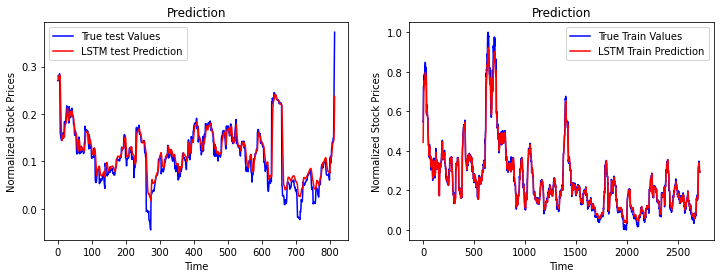

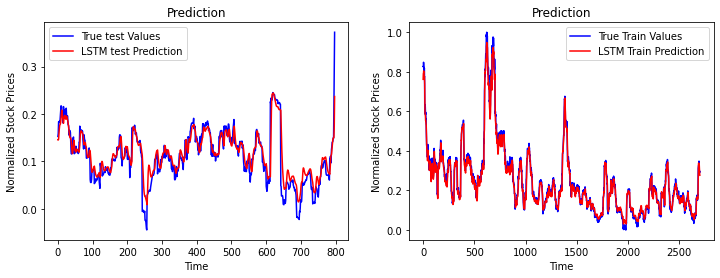

In [ ]:
from arch import arch_model
output=pd.DataFrame()
output_train=pd.DataFrame()
for sym in symbols:
  df = data[sym]
  df.index = data['Timestamp']
  df=pd.DataFrame(df)
  am = arch_model(df['Volatility_Copper'], vol='Garch', p=1, o=0, q=1, dist='Normal')
  res = am.fit()
  display(res.summary())
  df['forecast_vol_Copper'] = 0.1 * np.sqrt(res.params['omega'] + res.params['alpha[1]'] * res.resid**2 + res.conditional_volatility**2 * res.params['beta[1]'])
  split_date = pd.Timestamp('01-01-2017')
  train = df.loc[:split_date]
  test = df.loc[split_date:]
  sc = MinMaxScaler()
  train_sc = sc.fit_transform(train)
  test_sc = sc.transform(test)

  ann = []
  gru = []
  lstm = []
  cnn = []
  GARCH_lstm = []
  output[sym + "_" + "True_test"] = pd.Series(np.reshape(test_sc[:,0], ( -1)))
  output_train[sym + "_" + "True_train"] = pd.Series(np.reshape(train_sc[:,0], ( -1)))
  for win_sz in window_sizes:
    ann_result = []
    gru_result = []
    lstm_result = []
    cnn_result = []
    lstm_GARCH_result = []
    pred_ANN = []
    pred_LSTM = []
    pred_GRU = []
    pred_CNN = []
    pred_GARCH_LSTM = []
    pred_GARCH_LSTM_train = []
    
    for i in range(5):
                    
      X_train, y_train = window_transform(train_sc, win_sz)
      X_test, y_test = window_transform(test_sc, win_sz)
      X_tr_t = X_train.reshape(X_train.shape[0], win_sz, 2)
      X_tst_t = X_test.reshape(X_test.shape[0], win_sz, 2)
      y_train = np.delete(y_train,1,1)
      y_test = np.delete(y_test,1,1)
      X_tr_t = X_tr_t.reshape(X_tr_t.shape[0], win_sz, 2)
      X_tst_t = X_tst_t.reshape(X_tst_t.shape[0], win_sz, 2)

      model = make_GARCH_lstm_model(win_sz)
      early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
      history_model_GARCH_lstm = model.fit(X_tr_t, y_train, epochs=100, batch_size=32, verbose=1, shuffle=False,callbacks=[early_stop])

      train_acc, test_acc = test_model(model, X_tr_t, X_tst_t, y_train, y_test)
      y_pred_test_GARCH_LSTM = model.predict(X_tst_t)
      y_pred_test_GARCH_LSTM_train = model.predict(X_tr_t)
      lstm_GARCH_result.append(test_acc)

      #pred_LSTM.append(y_pred_test_LSTM)
      pred_GARCH_LSTM.append(y_pred_test_GARCH_LSTM)
      pred_GARCH_LSTM_train.append(y_pred_test_GARCH_LSTM_train)


    #lstm.append([win_sz, min(lstm_result), np.mean(lstm_result), np.std(lstm_result)])
    GARCH_lstm.append([win_sz, min(lstm_GARCH_result), np.mean(lstm_GARCH_result), np.std(lstm_GARCH_result)])  

    
    plot_GARCH_lstm = [0] * len(pred_GARCH_LSTM[0])
    for pred in pred_GARCH_LSTM:
        plot_GARCH_lstm = list(map(add, plot_GARCH_lstm, pred))

    for i in range(len(plot_GARCH_lstm)):
        plot_GARCH_lstm[i] = plot_GARCH_lstm[i] / 5

    plot_GARCH_lstm_train = [0] * len(pred_GARCH_LSTM_train[0])
    for pred in pred_GARCH_LSTM_train:
        plot_GARCH_lstm_train = list(map(add, plot_GARCH_lstm_train, pred))

    for i in range(len(plot_GARCH_lstm_train)):
        plot_GARCH_lstm_train[i] = plot_GARCH_lstm_train[i] / 5

    output[sym + "_" + str(win_sz) + "_test_LSTM"] = pd.Series(np.reshape(plot_GARCH_lstm, (-1)))
    output_train[sym + "_" + str(win_sz) + "_train_LSTM"] = pd.Series(np.reshape(plot_GARCH_lstm_train, (-1)))
    output[sym + "_" + str(win_sz) + "_test_real_LSTM"] = pd.Series(np.reshape(y_test, (-1)))
    output_train[sym + "_" + str(win_sz) + "_train_real_LSTM"] = pd.Series(np.reshape(y_train, (-1)))

    f = plt.figure(figsize=(12,4))
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122)

    ax1.plot(y_test, '-', label='True test Values', color='b')
    ax1.plot(plot_GARCH_lstm, label='LSTM test Prediction', color='r')
    ax1.set_title("Prediction")
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Normalized Stock Prices')
    ax1.legend()

    ax2.plot(y_train, '-', label='True Train Values', color='b')
    ax2.plot(plot_GARCH_lstm_train, label='LSTM Train Prediction', color='r')
    ax2.set_title("Prediction")
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Normalized Stock Prices')
    ax2.legend()
output.to_excel('output.xlsx')   
output_train.to_excel('output_train.xlsx')   

In [ ]:
df1 = output_train
df1.index = data['Timestamp'].iloc[0:df1.shape[0]].values
df2 = output
df2.index = data['Timestamp'].iloc[df1.shape[0]:(df1.shape[0]+df2.shape[0])].values

In [ ]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import base64
def create_download_link(df2, title = "Download CSV file", filename = "Copper_test.csv"):
    csv = df2.to_csv(index=True)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)
create_download_link(df2)

In [ ]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import base64
def create_download_link(df1, title = "Download CSV file", filename = "Copper_train.csv"):
    csv = df1.to_csv(index=True)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)
create_download_link(df1)